In [83]:
%pylab inline
from pygadgetreader import readsnap, readheader
import sys
import octopus
sys.path.insert(0, '../src/')
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


In [64]:
path = '/media/ngaravito/4fb4fd3d-1665-4892-a18d-bdbb1185a07b/simulations/LMCMW40M/MWLMC6/'
def N_body_orbit(snap_n, p_id):
    pos = readsnap(path +'MWLMC6_40M_b0_{:03d}'.format(snap_n), 'pos', 'dm')
    vel = readsnap(path +'MWLMC6_40M_b0_{:03d}'.format(snap_n), 'vel', 'dm')
    mass = readsnap(path +'MWLMC6_40M_b0_{:03d}'.format(snap_n), 'mass', 'dm')
    pid = readsnap(path +'MWLMC6_40M_b0_{:03d}'.format(snap_n), 'pid', 'dm')
    time = readheader(path +'MWLMC6_40M_b0_{:03d}'.format(snap_n), 'time')
    index_id = np.where(pid == p_id)[0]
    return pos[index_id], vel[index_id], time

def particle_orbit(t, pid, snap_init):
    N_snaps = 200
    particle_pos = np.zeros((N_snaps,3))
    particle_vel = np.zeros((N_snaps,3))

    time=0
    t_orb = np.zeros(N_snaps)
    i=0 + snap_init
    while time<t:
        particle_pos[i-snap_init], particle_vel[i-snap_init],\
        t_orb[i-snap_init] = N_body_orbit(i, pid)
        time = t_orb[i-snap_init] - t_orbit[0]
        i+=1
    #_pos = LMCMW_pos[index]
    #_vel = LMCMW_vel[index]
    return particle_pos[:i+1-snap_init], particle_vel[:i+1-snap_init],t_orb[:i+1-snap_init]

def particle_pos_vel(x, y, z, vx, vy, vz):
    """
    Finds the particle id of a a particle with the closest 
    given phase space coordinates.
    
    """
    pos = readsnap(path +'MWLMC6_40M_b0_115', 'pos', 'dm')
    vel = readsnap(path +'MWLMC6_40M_b0_115', 'vel', 'dm')
    pid = readsnap(path +'MWLMC6_40M_b0_115', 'pid', 'dm')
    #R = np.sqrt(LMCMW_pos[:,0]**2.0 + LMCMW_pos[:,1]**2.0 + LMCMW_pos[:,2]**2.0)
    #V = np.sqrt(LMCMW_vel[:,0]**2.0 + LMCMW_vel[:,1]**2.0 + LMCMW_vel[:,2]**2.0)
    x_dif = pos[:,0] - x
    y_dif = pos[:,1] - y
    z_dif = pos[:,2] - z
    

    space = np.sqrt(x_dif**2 + y_dif**2 + z_dif**2)
    index_pos = np.where(space<2)
    
    pid_space = pid[index_pos]
    pos_space = pos[index_pos]
    vel_space = vel[index_pos]
    
    vx_dif = vel_space[:,0] - vx
    vy_dif = vel_space[:,1] - vy
    vz_dif = vel_space[:,2] - vz
    
    velocity = np.sqrt(vx_dif**2 + vy_dif**2 + vz_dif**2)
    index_vel = np.argmin(velocity)

    
    return pid_space[index_vel], pos_space[index_vel, 0], pos_space[index_vel, 1], \
           pos_space[index_vel, 2], vel_space[index_vel, 0], vel_space[index_vel, 1], \
           vel_space[index_vel, 2]

In [76]:
p_ids, x_init, y_init, z_init, vx_init, vy_init, vz_init = particle_pos_vel(200, 0, 0, 0, 200, 0)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [77]:
print(p_ids, x_init, y_init, z_init, vx_init, vy_init, vz_init)

18971587 200.245 0.688381 1.39297 -161.237 -81.0606 30.8352


In [78]:
particle_nbody_orbit, particle_nbody_vel, t_orbit = particle_orbit(0.5, p_ids, 115)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass

In [52]:
len(particle_nbody_orbit)

28

In [53]:
Nhalo = 37500000
pos_cm_LMC, vel_cm_LMC, a, b = octopus.orbit(path, 'MWLMC6_40M_b0', 115, 143, Nhalo, 0.025, lmc=False, disk=True)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DM    Positions
Returnin

In [54]:
len(pos_cm_LMC)

29

In [79]:
print(particle_nbody_orbit[0, 0]-pos_cm_LMC[0, 0])
print(particle_nbody_orbit[0, 1]-pos_cm_LMC[0, 1])
print(particle_nbody_orbit[0, 2]-pos_cm_LMC[0, 2])

198.739321952
-47.8209347752
7.24835907086


In [80]:
print(particle_nbody_vel[0, 0]-vel_cm_LMC[0, 0])
print(particle_nbody_vel[0, 1]-vel_cm_LMC[0, 1])
print(particle_nbody_vel[0, 2]-vel_cm_LMC[0, 2])

-172.159717794
-113.663260181
82.7473262221


In [95]:
## trying to interpotale to move the SCF orbit with the COM from the n-body simulation. but doesn't work
fx = interpolate.interp1d(np.linspace(0, 0.5, len(pos_cm_LMC)), pos_cm_LMC[:, 0]-pos_cm_LMC[0,0])
fy = interpolate.interp1d(np.linspace(0, 0.5, len(pos_cm_LMC)), pos_cm_LMC[:, 1]-pos_cm_LMC[0,1])

In [96]:
x_cm = fx(np.linspace(0, 0.5, len(SCF_orbit[:,1])))
y_cm = fy(np.linspace(0, 0.5, len(SCF_orbit[:,1])))

In [81]:
SCF_orbit = np.loadtxt('../src/test_stratic_orbit_LMC6')

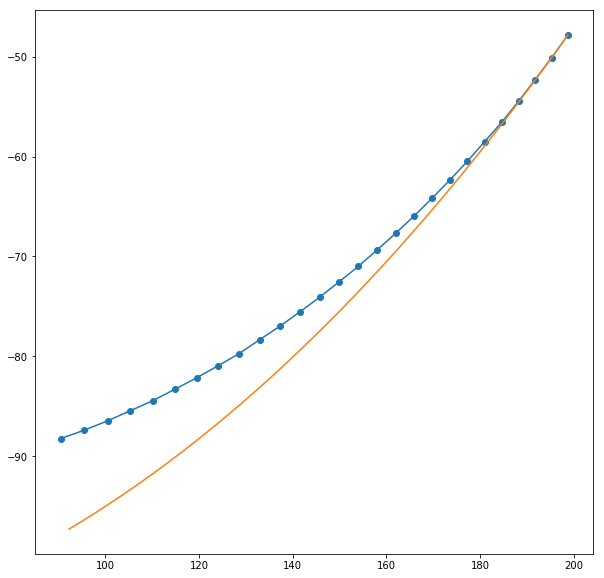

In [101]:
figure(figsize=(10,10))
plot(particle_nbody_orbit[:-1,0]-pos_cm_LMC[:-2,0], 
     particle_nbody_orbit[:-1,1]-pos_cm_LMC[:-2,1]
     , label='N-body', marker='o')
plot(SCF_orbit[:,1], SCF_orbit[:,2])

## The difference might be:

1. The potential in the SCF computation is satitc.